In [5]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.8.*"


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 7.8 MB/s 
     |████████████████████████████████| 1.3 MB 48.3 MB/s 
     |████████████████████████████████| 118 kB 57.8 MB/s 
     |████████████████████████████████| 1.1 MB 28.1 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 352 kB 40.7 MB/s 
     |████████████████████████████████| 238 kB 70.4 MB/s 


In [7]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [8]:
!pip install -q transformers

     |████████████████████████████████| 5.5 MB 6.9 MB/s 
     |████████████████████████████████| 7.6 MB 29.9 MB/s 
     |████████████████████████████████| 163 kB 45.7 MB/s 


In [9]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_old = pd.read_csv("/content/df_dominant_topic.csv")

df_old

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.3433,"nice, material, very, wear, comfortable, buy, ...",Fit: GoodColour: GoodMaterial Quality: Very go...
1,1,4.0,0.2875,"good, thank, seller, delivery, fast, receive, ...",Fit: comfortableColour: niceMaterial Quality: ...
2,2,4.0,0.3794,"good, thank, seller, delivery, fast, receive, ...",Material Quality: goodColour: niceNo regrets w...
3,3,6.0,0.3648,"size, fit, big, kg, cm, too, month, get, pregn...",Fit: 👍🏻Colour: 👍🏻Material Quality: no good qui...
4,4,4.0,0.2588,"good, thank, seller, delivery, fast, receive, ...",Material Quality: SoftColour: GreyFast deliver...
...,...,...,...,...,...
2696,2696,1.0,0.4629,"nice, material, very, wear, comfortable, buy, ...","Best material, it's very soft."
2697,2697,6.0,0.2586,"size, fit, big, kg, cm, too, month, get, pregn...","After all, it has arrived, from a big part of ..."
2698,2698,4.0,0.3361,"good, thank, seller, delivery, fast, receive, ...",The item is received in good condition. But th...
2699,2699,6.0,0.3743,"size, fit, big, kg, cm, too, month, get, pregn...",Product 👍 Silap ambic size l. The size m is go...


In [12]:
df_old["Dominant_Topic"] = df_old["Dominant_Topic"] +1

In [13]:
df_old[df_old["Dominant_Topic"] == 6]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
487,487,6.0,0.2910,"arrive, beautiful, safely, first, wife, alread...",Ordered on cny eve (mon) and received it on fr...
496,496,6.0,0.2532,"arrive, beautiful, safely, first, wife, alread...","Next day delivery, which is awesome~~\nBought ..."
497,497,6.0,0.2913,"arrive, beautiful, safely, first, wife, alread...",First time order for this!! But trust all mumm...
1453,1453,6.0,0.2435,"arrive, beautiful, safely, first, wife, alread...",Standard delivery from China reach about 1 wee...
1914,1914,6.0,0.2562,"arrive, beautiful, safely, first, wife, alread...","looks ok/sturdy, hope pregnant friend finds th..."
2359,2359,6.0,0.2472,"arrive, beautiful, safely, first, wife, alread...",Material: good fabricQuality: finished using...
2445,2445,6.0,0.3372,"arrive, beautiful, safely, first, wife, alread...",Best giler you want me to buy in the morning t...
2470,2470,6.0,0.3489,"arrive, beautiful, safely, first, wife, alread...","After all it has arrived, big sikitt and labu...."
2537,2537,6.0,0.3100,"arrive, beautiful, safely, first, wife, alread...","After all, the clothes are slow, i use the xnp..."
2652,2652,6.0,0.3149,"arrive, beautiful, safely, first, wife, alread...",Wife suka…next reper lg


In [14]:
df_old = df_old[(df_old["Dominant_Topic"] != 5.0) & (df_old["Dominant_Topic"] != 6.0)]

df_old

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.3433,"nice, material, very, wear, comfortable, buy, ...",Fit: GoodColour: GoodMaterial Quality: Very go...
3,3,7.0,0.3648,"size, fit, big, kg, cm, too, month, get, pregn...",Fit: 👍🏻Colour: 👍🏻Material Quality: no good qui...
6,6,2.0,0.5933,"nice, material, very, wear, comfortable, buy, ...","3rd purchase from seller. As usual, delivery i..."
8,8,2.0,0.6071,"nice, material, very, wear, comfortable, buy, ...",Fit: just niceColour: awesomeMaterial Quality:...
9,9,7.0,0.4670,"size, fit, big, kg, cm, too, month, get, pregn...",Fit: goodColour: goodMaterial Quality: better ...
...,...,...,...,...,...
2691,2691,7.0,0.2309,"size, fit, big, kg, cm, too, month, get, pregn...","The quality is good, i gave a very good rate. ..."
2696,2696,2.0,0.4629,"nice, material, very, wear, comfortable, buy, ...","Best material, it's very soft."
2697,2697,7.0,0.2586,"size, fit, big, kg, cm, too, month, get, pregn...","After all, it has arrived, from a big part of ..."
2699,2699,7.0,0.3743,"size, fit, big, kg, cm, too, month, get, pregn...",Product 👍 Silap ambic size l. The size m is go...


In [15]:
testing = df_old["Text"].to_list()

In [16]:
len(testing)

1800

In [18]:
testing[410]

"So comfy and soft, it's on the thinner side but not see through. Proper panties r needed if not very awful. Thinking of buying more now especially when you are getting bigger and nothing fits or is comfortable anymore."

In [19]:
sentiment_pipeline("Quality is a bit thin, delivery took 2 days. Over good to get it during flash sales")

[{'label': 'NEGATIVE', 'score': 0.9996281862258911}]

In [20]:
sentiments = sentiment_pipeline(testing)

In [21]:
df2 = df_old[["Dominant_Topic","Text"]]

df2 = df2.reset_index(drop = True)

In [22]:
sentiment_df = pd.DataFrame(sentiments)

In [23]:
df3 = df2.join(sentiment_df)

In [24]:
df3.to_csv("/content/sentiments_df.csv",index = False)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("/content/sentiments_df.csv")

In [27]:
df.tail()

,Dominant_Topic,Text,label,score
1795,7.0,"The quality is good, i gave a very good rate. ...",POSITIVE,0.994171
1796,2.0,"Best material, it's very soft.",POSITIVE,0.999802
1797,7.0,"After all, it has arrived, from a big part of ...",NEGATIVE,0.996187
1798,7.0,Product 👍 Silap ambic size l. The size m is go...,POSITIVE,0.787382
1799,2.0,Nice,POSITIVE,0.999855


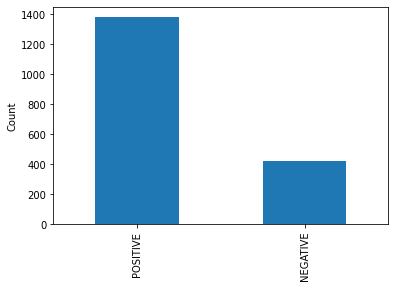

In [28]:
df["label"].value_counts().plot(kind="bar", ylabel ="Count")

In [29]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
df_pos = df[df["label"] == "POSITIVE"]
df_neg = df[df["label"] == "NEGATIVE"]


In [79]:
stopwords_augmented = list(STOPWORDS) + ['leggings','area','pant', 'pregnant',
                                         'seller', 'XL','delivery','size', 
                                         'material', 'Quality', 'wear', 'fit',
                                         'quite', 'will', 'really', 'fabric', 
                                         'legging', 'Ordered', 'kg', 'weight',
                                         'even', 'think', 'm', 'try', 'L', 'Overall',
                                         'grey', 'belly', 'colour', 'color', 'pants',
                                         'one', 'purchase', 'got', 'take', 'arrived',
                                         'look', 'month', 'see', 'buy', 'week',
                                         'black', 'button', 'use', '160cm', 'months',
                                         'Item', 'now']

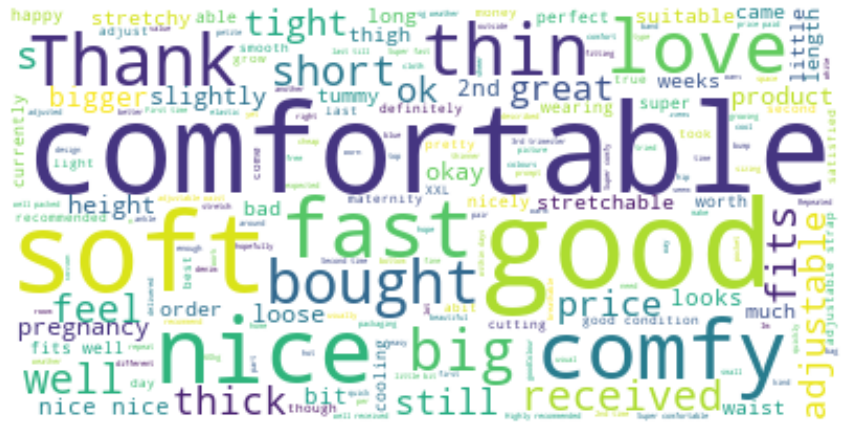

In [80]:
pos_text = " ".join(i for i in df_pos.Text)
stopwords = set(stopwords_augmented)
wordcloud = WordCloud(stopwords=stopwords_augmented, background_color="white").generate(pos_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

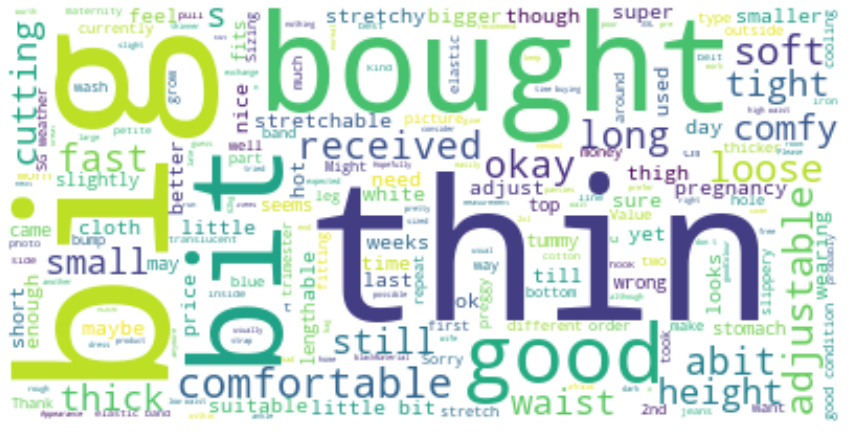

In [81]:
neg_text = " ".join(i for i in df_neg.Text)
stopwords = set(stopwords_augmented)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()